In [1]:
# Step 1: Importing The Libraries
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 2: Importing The Data
data = pd.read_csv("D:/Datasets/Machine Learning/auto-mpg.csv")

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
# Step 3: Data Pre-Processing/Cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.drop(columns='car name',inplace=True)

In [11]:
data['horsepower'] = data['horsepower'].replace({'?':0})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [13]:
data['horsepower'] = data['horsepower'].astype('int')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


In [16]:
data['origin'].unique()

array([1, 3, 2], dtype=int64)

In [17]:
# Step 4: Splitting The Data
X = data.drop(columns='mpg')
y = data['mpg']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=300)

In [18]:
# Step 5: Building The Model
#     5.1: Initializing the Model
from sklearn.neighbors import KNeighborsRegressor
neibour_model = KNeighborsRegressor()

In [19]:
# 5.2: Training The Model
neibour_model.fit(X_train,y_train)

KNeighborsRegressor()

In [20]:
# 5.3: Making Predictions From The Model
y_pred = neibour_model.predict(X_test)

In [21]:
# 5.4: Testing The Model
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_pred,y_test))

0.6421291670015723


# 64%

In [22]:
print(mean_squared_error(y_pred,y_test))

16.313533333333332


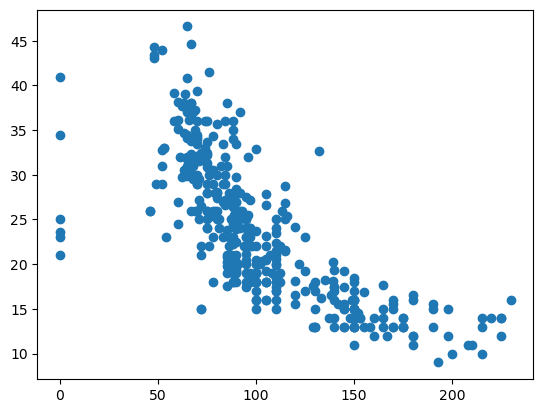

In [23]:
plt.scatter(data['horsepower'],data['mpg'])